In [3]:
import numpy as np
import cv2
import pandas as pd

In [18]:
dataset_path = '../fer2013/fer2013/fer2013.csv'
data = pd.read_csv(dataset_path)
data

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


In [19]:
face = [int(pixel) for pixel in data['pixels'][0].split(' ')]
face = np.asarray(face)
face = face.reshape(48,48)
face.shape

(48, 48)

In [20]:
face

array([[ 70,  80,  82, ...,  52,  43,  41],
       [ 65,  61,  58, ...,  56,  52,  44],
       [ 50,  43,  54, ...,  49,  56,  47],
       ...,
       [ 91,  65,  42, ...,  72,  56,  43],
       [ 77,  82,  79, ..., 105,  70,  46],
       [ 77,  72,  84, ..., 106, 109,  82]])

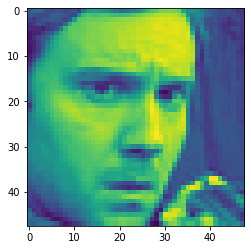

In [21]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.imshow(face)
plt.show()

consisting of 48x48 grayscale images like the above

In [22]:
face = cv2.resize(face.astype('uint8'),(48,48))
face.shape

(48, 48)

In [23]:
face

array([[ 70,  80,  82, ...,  52,  43,  41],
       [ 65,  61,  58, ...,  56,  52,  44],
       [ 50,  43,  54, ...,  49,  56,  47],
       ...,
       [ 91,  65,  42, ...,  72,  56,  43],
       [ 77,  82,  79, ..., 105,  70,  46],
       [ 77,  72,  84, ..., 106, 109,  82]], dtype=uint8)

In [25]:
face = face.astype('float32')
face

array([[ 70.,  80.,  82., ...,  52.,  43.,  41.],
       [ 65.,  61.,  58., ...,  56.,  52.,  44.],
       [ 50.,  43.,  54., ...,  49.,  56.,  47.],
       ...,
       [ 91.,  65.,  42., ...,  72.,  56.,  43.],
       [ 77.,  82.,  79., ..., 105.,  70.,  46.],
       [ 77.,  72.,  84., ..., 106., 109.,  82.]], dtype=float32)

In [29]:
faces = []
faces.append(face)
faces

[array([[ 70.,  80.,  82., ...,  52.,  43.,  41.],
        [ 65.,  61.,  58., ...,  56.,  52.,  44.],
        [ 50.,  43.,  54., ...,  49.,  56.,  47.],
        ...,
        [ 91.,  65.,  42., ...,  72.,  56.,  43.],
        [ 77.,  82.,  79., ..., 105.,  70.,  46.],
        [ 77.,  72.,  84., ..., 106., 109.,  82.]], dtype=float32)]

In [30]:
faces = np.asarray(faces)
faces

array([[[ 70.,  80.,  82., ...,  52.,  43.,  41.],
        [ 65.,  61.,  58., ...,  56.,  52.,  44.],
        [ 50.,  43.,  54., ...,  49.,  56.,  47.],
        ...,
        [ 91.,  65.,  42., ...,  72.,  56.,  43.],
        [ 77.,  82.,  79., ..., 105.,  70.,  46.],
        [ 77.,  72.,  84., ..., 106., 109.,  82.]]], dtype=float32)

In [31]:
faces.shape

(1, 48, 48)

In [32]:
faces = np.expand_dims(faces,-1)

In [33]:
faces

array([[[[ 70.],
         [ 80.],
         [ 82.],
         ...,
         [ 52.],
         [ 43.],
         [ 41.]],

        [[ 65.],
         [ 61.],
         [ 58.],
         ...,
         [ 56.],
         [ 52.],
         [ 44.]],

        [[ 50.],
         [ 43.],
         [ 54.],
         ...,
         [ 49.],
         [ 56.],
         [ 47.]],

        ...,

        [[ 91.],
         [ 65.],
         [ 42.],
         ...,
         [ 72.],
         [ 56.],
         [ 43.]],

        [[ 77.],
         [ 82.],
         [ 79.],
         ...,
         [105.],
         [ 70.],
         [ 46.]],

        [[ 77.],
         [ 72.],
         [ 84.],
         ...,
         [106.],
         [109.],
         [ 82.]]]], dtype=float32)

In [34]:
faces.shape

(1, 48, 48, 1)

In [38]:
emotions = pd.get_dummies(data['emotion']).values
emotions.shape


(35887, 7)

In [44]:
# normalization
normalized_face = face / 255.0
normalized_face

array([[0.27450982, 0.3137255 , 0.32156864, ..., 0.20392157, 0.16862746,
        0.16078432],
       [0.25490198, 0.23921569, 0.22745098, ..., 0.21960784, 0.20392157,
        0.17254902],
       [0.19607843, 0.16862746, 0.21176471, ..., 0.19215687, 0.21960784,
        0.18431373],
       ...,
       [0.35686275, 0.25490198, 0.16470589, ..., 0.28235295, 0.21960784,
        0.16862746],
       [0.3019608 , 0.32156864, 0.30980393, ..., 0.4117647 , 0.27450982,
        0.18039216],
       [0.3019608 , 0.28235295, 0.32941177, ..., 0.41568628, 0.42745098,
        0.32156864]], dtype=float32)

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=uint8)